In [ ]:
# Imports
import torch
import torchvision
from torchvision.datasets import MNIST

In [ ]:
from six.moves import urllib    
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

In [ ]:
# Download training dataset
dataset = MNIST(root='../data/', download=True)


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:479: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
test_dataset = MNIST(root='../data/', train=False)

In [ ]:
test_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../data/
    Split: Test

In [ ]:
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../data/
    Split: Train

In [ ]:
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [ ]:
# MNIST dataset (images and labels)
dataset = MNIST(root='..data/', 
                train=True,
                download=True,
                transform=transforms.ToTensor())


Extracting ..data/MNIST/raw/train-images-idx3-ubyte.gz to ..data/MNIST/raw



Extracting ..data/MNIST/raw/train-labels-idx1-ubyte.gz to ..data/MNIST/raw



Extracting ..data/MNIST/raw/t10k-images-idx3-ubyte.gz to ..data/MNIST/raw



Extracting ..data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ..data/MNIST/raw
Processing...
Done!


In [ ]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


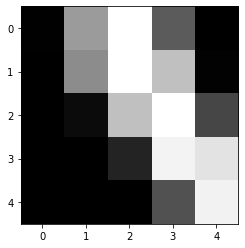

In [ ]:
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray')

# Training and Validation Datasets

In [ ]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [ ]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

# Model

In [ ]:
import torch.nn as nn

In [ ]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [ ]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0041,  0.0304,  0.0045,  ..., -0.0164, -0.0035, -0.0060],
        [-0.0198,  0.0292,  0.0096,  ...,  0.0355, -0.0199, -0.0288],
        [ 0.0164,  0.0254, -0.0256,  ..., -0.0111,  0.0179,  0.0276],
        ...,
        [-0.0276,  0.0195, -0.0135,  ..., -0.0220,  0.0327, -0.0044],
        [-0.0078,  0.0153,  0.0200,  ..., -0.0269, -0.0321, -0.0199],
        [ 0.0090,  0.0009, -0.0240,  ...,  0.0166,  0.0141, -0.0263]],
       requires_grad=True)

In [ ]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    images = images.reshape(128, 784)
    print(images.shape)
    outputs = model(images)
    print(outputs.shape)
    break


tensor([9, 9, 5, 4, 8, 5, 0, 1, 7, 8, 9, 7, 0, 3, 5, 6, 1, 1, 7, 4, 5, 9, 7, 4,
        6, 8, 5, 7, 4, 3, 1, 4, 4, 4, 4, 5, 9, 7, 7, 0, 4, 5, 6, 0, 1, 3, 8, 3,
        2, 2, 1, 9, 6, 7, 4, 2, 6, 3, 3, 7, 2, 7, 7, 0, 9, 7, 8, 6, 2, 8, 4, 2,
        1, 3, 4, 2, 4, 4, 7, 5, 9, 4, 2, 9, 9, 9, 0, 7, 8, 5, 8, 8, 6, 9, 2, 1,
        2, 5, 3, 4, 2, 3, 5, 1, 5, 0, 0, 6, 7, 6, 2, 9, 2, 1, 7, 5, 7, 1, 7, 1,
        7, 9, 8, 2, 7, 4, 4, 8])
torch.Size([128, 1, 28, 28])
torch.Size([128, 784])
torch.Size([128, 10])


In [ ]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [ ]:
model.linear

print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0075, -0.0232, -0.0282,  ..., -0.0322, -0.0097,  0.0350],
         [ 0.0246, -0.0210, -0.0275,  ...,  0.0163,  0.0206, -0.0342],
         [-0.0110, -0.0002, -0.0106,  ...,  0.0239,  0.0331, -0.0341],
         ...,
         [ 0.0043,  0.0239,  0.0040,  ...,  0.0347,  0.0161, -0.0233],
         [-0.0324, -0.0152,  0.0345,  ..., -0.0084,  0.0124, -0.0040],
         [-0.0071,  0.0126, -0.0173,  ..., -0.0053, -0.0265, -0.0140]],
        requires_grad=True), Parameter containing:
 tensor([ 0.0115, -0.0015, -0.0218,  0.0318, -0.0016,  0.0154,  0.0197,  0.0314,
          0.0201, -0.0209], requires_grad=True)]

In [ ]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[-0.0530, -0.1806, -0.0417,  0.0841,  0.2324, -0.1287, -0.2668,  0.0253,
         -0.0022, -0.1295],
        [ 0.0411,  0.0802,  0.1781,  0.1927, -0.2385, -0.0978, -0.1093, -0.0329,
          0.0377, -0.2062]])


In [ ]:
import torch.nn.functional as F

In [ ]:
probs = F.softmax(outputs,dim=1)

In [ ]:
print("Sum: ", torch.sum(probs[0]).item())

Sum:  1.0000001192092896


In [ ]:
torch.sum(probs[0])

tensor(1.0000, grad_fn=<SumBackward0>)

In [ ]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([4, 3, 8, 8, 8, 8, 7, 8, 9, 0, 0, 1, 3, 4, 2, 7, 0, 4, 1, 9, 4, 7, 2, 1,
        4, 8, 6, 8, 2, 4, 6, 6, 4, 6, 6, 7, 4, 4, 6, 8, 6, 0, 8, 0, 8, 4, 6, 2,
        6, 7, 6, 1, 6, 0, 6, 0, 7, 4, 7, 7, 6, 0, 4, 7, 0, 7, 6, 7, 8, 7, 6, 6,
        0, 3, 8, 2, 8, 7, 8, 1, 6, 3, 0, 0, 6, 1, 7, 8, 0, 7, 1, 8, 9, 8, 3, 7,
        8, 9, 8, 7, 8, 2, 3, 8, 4, 6, 5, 7, 3, 4, 6, 8, 6, 8, 3, 4, 8, 7, 8, 0,
        6, 6, 7, 8, 6, 0, 7, 0])
tensor([0.1309, 0.1219, 0.1130, 0.1128, 0.1178, 0.1177, 0.1198, 0.1105, 0.1259,
        0.1387, 0.1602, 0.1157, 0.1478, 0.1255, 0.1146, 0.1331, 0.1323, 0.1250,
        0.1233, 0.1190, 0.1152, 0.1250, 0.1201, 0.1489, 0.1350, 0.1248, 0.1255,
        0.1299, 0.1277, 0.1534, 0.1243, 0.1166, 0.1218, 0.1199, 0.1268, 0.1272,
        0.1445, 0.1266, 0.1246, 0.1087, 0.1224, 0.1348, 0.1314, 0.1398, 0.1379,
        0.1160, 0.1725, 0.1194, 0.1239, 0.1306, 0.1246, 0.1470, 0.1385, 0.1194,
        0.1209, 0.1162, 0.1248, 0.1105, 0.1312, 0.1186, 0.1323, 0.1381, 0.1619,
       

# Evaluation Metric and Loss Function

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
accuracy(outputs, labels)

tensor(0.1328)

In [ ]:
loss_fn = F.cross_entropy

In [ ]:
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3467, grad_fn=<NllLossBackward>)


In [ ]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [ ]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [ ]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [ ]:
result0 = evaluate(model, val_loader)
result0

{'val_acc': 0.1113528460264206, 'val_loss': 2.2937402725219727}

In [ ]:
history1 = fit(20, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1204, val_acc: 0.7989
Epoch [1], val_loss: 1.0476, val_acc: 0.8073
Epoch [2], val_loss: 0.9880, val_acc: 0.8147
Epoch [3], val_loss: 0.9384, val_acc: 0.8194
Epoch [4], val_loss: 0.8965, val_acc: 0.8242
Epoch [5], val_loss: 0.8606, val_acc: 0.8289
Epoch [6], val_loss: 0.8294, val_acc: 0.8326
Epoch [7], val_loss: 0.8022, val_acc: 0.8356
Epoch [8], val_loss: 0.7781, val_acc: 0.8383
Epoch [9], val_loss: 0.7567, val_acc: 0.8401
Epoch [10], val_loss: 0.7374, val_acc: 0.8420
Epoch [11], val_loss: 0.7201, val_acc: 0.8438
Epoch [12], val_loss: 0.7043, val_acc: 0.8451
Epoch [13], val_loss: 0.6900, val_acc: 0.8461
Epoch [14], val_loss: 0.6768, val_acc: 0.8475
Epoch [15], val_loss: 0.6647, val_acc: 0.8492
Epoch [16], val_loss: 0.6535, val_acc: 0.8516
Epoch [17], val_loss: 0.6431, val_acc: 0.8522
Epoch [18], val_loss: 0.6335, val_acc: 0.8527
Epoch [19], val_loss: 0.6245, val_acc: 0.8542


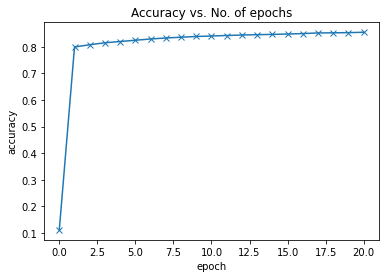

In [ ]:
history = [result0] + history1 
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

# Testing with individual images

In [ ]:
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     download=True,
                     transform=transforms.ToTensor())


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!


Shape: torch.Size([1, 28, 28])
Label: 7


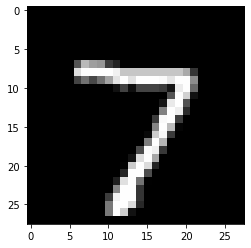

In [ ]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [ ]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


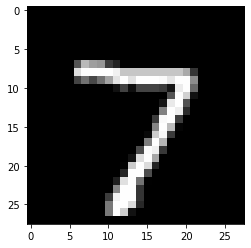

In [ ]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [ ]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_acc': 0.865527331829071, 'val_loss': 0.5886994004249573}

In [ ]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [ ]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0007,  0.0193,  0.0096,  ..., -0.0151, -0.0180, -0.0012],
                      [-0.0264,  0.0237, -0.0010,  ..., -0.0254, -0.0304, -0.0244],
                      [-0.0221, -0.0219, -0.0191,  ...,  0.0166,  0.0322,  0.0288],
                      ...,
                      [ 0.0097, -0.0240,  0.0327,  ..., -0.0347,  0.0027,  0.0016],
                      [-0.0023,  0.0261,  0.0185,  ...,  0.0170, -0.0113,  0.0307],
                      [-0.0006,  0.0351,  0.0115,  ..., -0.0091, -0.0025,  0.0077]])),
             ('linear.bias',
              tensor([-0.0810,  0.1228, -0.0367, -0.0366,  0.0478,  0.0531,  0.0188,  0.0427,
                      -0.0768,  0.0071]))])

In [ ]:
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()


OrderedDict([('linear.weight',
              tensor([[-0.0007,  0.0193,  0.0096,  ..., -0.0151, -0.0180, -0.0012],
                      [-0.0264,  0.0237, -0.0010,  ..., -0.0254, -0.0304, -0.0244],
                      [-0.0221, -0.0219, -0.0191,  ...,  0.0166,  0.0322,  0.0288],
                      ...,
                      [ 0.0097, -0.0240,  0.0327,  ..., -0.0347,  0.0027,  0.0016],
                      [-0.0023,  0.0261,  0.0185,  ...,  0.0170, -0.0113,  0.0307],
                      [-0.0006,  0.0351,  0.0115,  ..., -0.0091, -0.0025,  0.0077]])),
             ('linear.bias',
              tensor([-0.0810,  0.1228, -0.0367, -0.0366,  0.0478,  0.0531,  0.0188,  0.0427,
                      -0.0768,  0.0071]))])

In [ ]:
evaluate(model2, test_loader)

{'val_acc': 0.865527331829071, 'val_loss': 0.5886994004249573}